Библиометрический анализ журнала Feminist Economics


#Описание проекта

Цель проекта: провести библиометрический анализ международного научного журнала Feminist Economics с целью выявления основных тенденций развития научного направления Феминистская экономика (Экономика гендера). 


Описание данных: 
Спарсила с сайта редакции всю информацию о статьях и авторах. 
'Volume' Том (сквозная нумерация)
'Issue' Выпуск
'Issue_title' Название выпуска - есть в специальных выпусках
'Year' Год выпуска - с 1995 до 2022 
'Article_number' номер статьи - особенно важно, какая тема будет под номером один
'Title' - заглавие статьи - тоже полезно для определния тем
'Author1' -ФИО первого автора
'Author1_Info' - инфо о первом авторе. Из инфо можно извлечь страну, город, университет, факультет, номер ORCID  
'Author1_Contacts'- город и университет для авторов - так как для первых выпусков не было info
'Pages' номера страниц журнала - можно вычислить продолжительность статьи - но это будет не очень точно. Лучше количество знаков или слов. А на количество страниц могут влиять таблицы и рисунки и прочие приложения. Выделить первую статью в каждом номере и обратить на нее особое внимание
'Date_published' дата онлайн публикации статьи
'DOI' номер DOI
'Abstract' - текст аннотации статьи 
'Highlights' -  основные тезисы статьи. Есть только в последней трети статей. Наверное легче удалить
'Keywords' - ключевые слова
'JEL codes' - посмотреть какие области экономических наук покрывает направление feminist economics 
'Views' - количество просмотров статьи на сайте - выделить самые популярные темы
'CrossRef'- количество ссылок на эту статью в научной литературе
'Almetric' -  колчисевто ссылок на эту статью в сми и соцсетях
'References' - список цитируемой литературы
'Citations' - список статей, процитировавших эту статью 
'WOS' - число цитат в базе данных Web of Science 
'Scopus' число цитат в Скопусе 
'Open_access' - 1 означает, что статья бесплатная, 0 - платная 
'lemmatized_text' - лемматизированный текст
'lemmatized_tokens лемматизированные токены 

Задачи и методы проекта: 


1. Выявить основные темы статей журнала на основе анализа аннотаций всех выпусков статьей (28 лет, 4 выпуска в год. После парсинга данных в табличке стало 925 строчек)
Методы: были испробованы методы кластеризации, LDA, но они не показали хороших и интерпретируемых результатов. Самой удачной вышла модель TF IDF 
TF-IDF (term frequency - inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Мера TF-IDF часто используется в задачах анализа текстов и информационного поиска, например, как один из критериев релевантности документа поисковому запросу, при расчёте меры близости документов при кластеризации.

IDF не показала интересных результатов при использовании с одним словом. Поэтому попробовала посмотреть со словосочетаниями. 

Основные темы также можно посмотреть по ключевым словам и также посмотреть как они менялись по годам и сравнить с результатами анализа аннотаций 
Посмотреть темы по заглавиям статей 

2. Посмотреть, как менялись словосочетания по годам 
Сгруппировать таблицу по годам, объединить аннотации и посмотреть tf idf
Сделано 

3. Посмотреть контекст использования основных терминов, определяющих темы, таких как 
feminist / feminism, gender, 

Не сделано 

4. Посмотреть как связаны темы и авторы, особенно страны проживания и университеты, где работают авторы.  

5. Ключевые слова. Классифицировать ключевые слова и выделить оттуда названия стран, методы анализа и темы - сделано 

6. Посмотреть какие темы опубликуются в первой статье каждого выпуска журнала как самые главные с точки зрения редакции 

7. Построить линейную регрессию, предсказывающую популярность статьи и посмотреть, как это связано с темами (сделать дамми из самых важных слов и словосочетаний)

8. Посмотреть какие темы (авторы, университеты) самые цитируемые в науке/ в сми

#Библиотеки и данные

In [33]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

pd.set_option('display.max_columns', None)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sofiarebrey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
df = pd.read_excel('tandfonline-02.xlsx')
df

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access
0,1,1,NaN,1995,9689203,Creating a forum for feminist economic inquiry,Diana Strassmann,NaN,"Center for Cultural Studies, Rice University",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-5,18 Jun 2010,https://doi.org/10.1080/714042211,NaN,NaN,NaN,NaN,123,14,0,NaN,Sheba Tejani. (2019) What’s feminist about fem...,0.0,15.0,1
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,"Feminism,method,objectivity,philosophy of econ...",NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1
2,1,1,NaN,1995,9689205,Robinson Crusoe: The quintessential economic man?,Ulla Grapard,NaN,"Department of Economics, Colgate University, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-52,18 Jun 2010,https://doi.org/10.1080/714042213,The tale of Robinson Crusoe strikes a responsi...,NaN,"Robinson Crusoe, homo economics,self-sufficien...",NaN,845,19,0,NaN,Nancy Folbre. (2020) Manifold exploitations: t...,0.0,58.0,1
3,1,1,NaN,1995,9689206,What difference does gender make? Rethinking p...,Carmen Diana Deere,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-72,18 Jun 2010,https://doi.org/10.1080/714042214,This article argues that gender analysis has c...,NaN,"Peasants,gender,Latin American rural women,con...",NaN,238,30,0,NaN,"Grettel Navas. (2022) ‘If there's no evidence,...",0.0,40.0,1
4,1,1,NaN,1995,9689207,"""Holding hands at midnight"": The paradox of ca...",Nancy Folbre,NaN,"Department of Economics, University of Massach...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73-92,18 Jun 2010,https://doi.org/10.1080/714042215,This paper puts recent feminist theorizing abo...,NaN,"Caring,labor,family,policy,altruism,reciprocity",NaN,842,145,25,NaN,"Özlem Onaran, Cem Oyvat, Eurydice Fotopoulou. ...",0.0,189.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,28,1,NaN,2022,1976808,Seasonal Migration and Feminization of Farm Ma...,S. Chandrasekhar,S. Chandrasekhar is Professor at Indira Gandhi...,a Indira Gandhi Institute of Development Resea...,Soham Sahoo,Soham Sahoo is Assistant Professor at the Cent...,b Indian Institute of Management Bangalore – C...,Hema Swaminathan,Hema Swaminathan is Associate Professor at the...,c Indian Institute of Management Bangalore – C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86-113,07 Nov 2021,https://doi.org/10.1080/13545701.2021.1976808,NaN,the importance of unpacking the feminization ...,"Feminization of agriculture,women farm manager...","Q1, R2, J1",160,0,0,"Agarwal, Bina.2018. “Can Group Farms Outperfor...",NaN,0.0,0.0,0
920,28,1,NaN,2022,1983190,Gender Gaps in Wages and Mortality Rates Durin...,Pilar Beneito,Pilar Beneito holds an M

#Abstract

In [35]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 


In [36]:
# С помощью регулярных выражений оставляем только слова и слова, написанные через дефис и 
# и делаем нижний регистр, а также проводим лемматизацию и очищаем от стоп-слов 

def clean(text):
    tokens = re.findall('\w+-?\w*', text.lower())
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words]
    return ' '.join(tokens)


In [37]:
#Оставляем только непустые значения аннотаций, чистим и токенизируем аннотации
df = df[~df.Abstract.isna()]
df['lemmatized_text'] = df['Abstract'].apply(clean)

<ipython-input-37-0b00f752a344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['Abstract'].apply(clean)


In [38]:

def get_idf_tokens(texts, max_df, min_df=4):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, idf_dict

def get_idf_ngrams(texts, max_df, min_df=4, ngram_range=2):
    total = len(texts)
    max_df = int(total * max_df)
    doc_freq = dict()
    
    for text in texts:
        tokens = text.split(' ')
        tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in doc_freq:
                doc_freq[token] = 1
            else:
                doc_freq[token] += 1
    
    idf_dict = {token: np.log(total/doc_freq[token]) 
                for token in doc_freq 
                if doc_freq[token] > min_df and doc_freq[token] <= max_df}
    return idf_dict, doc_freq

def get_tf_dict(texts, ngram_range=2):
    tf_dict = dict()
    
    for text in texts:
        tokens = text.split(' ')
        if ngram_range >= 2:
            tokens = nltk.ngrams(tokens, ngram_range)
        for token in set(tokens):
            if token not in tf_dict:
                tf_dict[token] = 1
            else:
                tf_dict[token] += 1
    return tf_dict
            
        

In [39]:
tf_dict = get_tf_dict(df['lemmatized_text'], 2)
sorted_tokens = sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

In [40]:
#Наиболее важные словосочетания для аннотаций
sorted_tokens

[(('labor', 'market'), 95),
 (('labor', 'force'), 60),
 (('men', 'woman'), 59),
 (('study', 'find'), 58),
 (('woman', 'men'), 50),
 (('united', 'state'), 49),
 (('woman', 'labor'), 47),
 (('feminist', 'economics'), 46),
 (('force', 'participation'), 41),
 (('gender', 'gap'), 40),
 (('gender', 'inequality'), 40),
 (('using', 'data'), 39),
 (('study', 'examines'), 39),
 (('gender', 'difference'), 35),
 (('paid', 'work'), 34),
 (('woman', 'employment'), 32),
 (('paper', 'examines'), 30),
 (('feminist', 'economist'), 30),
 (('result', 'show'), 29),
 (('developing', 'country'), 28),
 (('unpaid', 'work'), 27),
 (('study', 'us'), 27),
 (('gender', 'equality'), 27),
 (('result', 'suggest'), 24),
 (('paper', 'argues'), 23),
 (('married', 'woman'), 23),
 (('time', 'use'), 22),
 (('woman', 'worker'), 22),
 (('paper', 'explores'), 22),
 (('bargaining', 'power'), 21),
 (('economic', 'growth'), 21),
 (('paid', 'unpaid'), 21),
 (('survey', 'data'), 20),
 (('among', 'woman'), 20),
 (('study', 'analyze

In [41]:
data = pd.DataFrame(sorted_tokens,columns=['collocations','freq'])

In [42]:
data.collocations

0                (labor, market)
1                 (labor, force)
2                   (men, woman)
3                  (study, find)
4                   (woman, men)
                  ...           
42271        (requiring, social)
42272      (social, interaction)
42273          (penalty, larger)
42274       (larger, occupation)
42275    (occupation, requiring)
Name: collocations, Length: 42276, dtype: object

In [43]:
data.to_excel('collocations.xlsx')

Попробуем увеличить количество слов в нграммах

In [89]:
tf_dict = get_tf_dict(df['lemmatized_text'], 3)
sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

[(('labor', 'force', 'participation'), 41),
 (('woman', 'labor', 'force'), 24),
 (('woman', 'labor', 'market'), 15),
 (('paid', 'unpaid', 'work'), 15),
 (('gender', 'wage', 'gap'), 11),
 (('time', 'use', 'survey'), 10),
 (('gender', 'division', 'labor'), 8),
 (('labor', 'market', 'outcome'), 8),
 (('labor', 'market', 'participation'), 8),
 (('demographic', 'health', 'survey'), 8),
 (('unpaid', 'care', 'work'), 8),
 (('issue', 'feminist', 'economics'), 7),
 (('woman', 'labor', 'supply'), 7),
 (('woman', 'bargaining', 'power'), 6),
 (('difference', 'men', 'woman'), 6),
 (('study', 'find', 'woman'), 6),
 (('china', 'health', 'retirement'), 6),
 (('retirement', 'longitudinal', 'study'), 6),
 (('longitudinal', 'study', 'charls'), 6),
 (('health', 'retirement', 'longitudinal'), 6),
 (('measure', 'gender', 'inequality'), 5),
 (('foreign', 'direct', 'investment'), 5),
 (('current', 'population', 'survey'), 5),
 (('german', 'socio-economic', 'panel'), 5),
 (('study', 'examines', 'impact'), 5),


In [90]:
tf_dict = get_tf_dict(df['lemmatized_text'], 4)
sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)

[(('woman', 'labor', 'force', 'participation'), 20),
 (('health', 'retirement', 'longitudinal', 'study'), 6),
 (('retirement', 'longitudinal', 'study', 'charls'), 6),
 (('china', 'health', 'retirement', 'longitudinal'), 6),
 (('woman', 'labor', 'market', 'participation'), 5),
 (('labor', 'force', 'participation', 'rate'), 4),
 (('time', 'use', 'survey', 'study'), 4),
 (('data', 'german', 'socio-economic', 'panel'), 4),
 (('german', 'socio-economic', 'panel', 'soep'), 4),
 (('female', 'labor', 'force', 'participation'), 4),
 (('labor', 'force', 'participation', 'lfp'), 4),
 (('household', 'income', 'labour', 'dynamic'), 4),
 (('income', 'labour', 'dynamic', 'australia'), 4),
 (('wave', 'china', 'health', 'retirement'), 4),
 (('feminist', 'economist', 'feminist', 'economist'), 3),
 (('special', 'issue', 'feminist', 'economics'), 3),
 (('labor', 'market', 'participation', 'rate'), 3),
 (('paid', 'unpaid', 'work', 'time'), 3),
 (('foreign', 'direct', 'investment', 'fdi'), 3),
 (('data', 'c

#Abstarct per year

In [44]:
df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())
grouped_per_year = df.groupby('Year')['lemmatized_tokens'].sum().reset_index()
year_count = df.groupby('Year')['Abstract'].count().reset_index()

grouped_per_year['freq'] = grouped_per_year['lemmatized_tokens'].apply(Counter)
grouped_per_year['total_abs'] = year_count['Abstract']

year_count = dict(zip(year_count['Year'], year_count['Abstract']))

<ipython-input-44-31592c947ac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['lemmatized_text'].apply(lambda x: x.split())


In [45]:
year_count

{1995: 32,
 1996: 24,
 1997: 24,
 1998: 27,
 1999: 29,
 2000: 21,
 2001: 17,
 2002: 22,
 2003: 22,
 2004: 21,
 2005: 21,
 2006: 19,
 2007: 24,
 2008: 25,
 2009: 24,
 2010: 23,
 2011: 25,
 2012: 29,
 2013: 31,
 2014: 35,
 2015: 30,
 2016: 32,
 2017: 32,
 2018: 33,
 2019: 34,
 2020: 31,
 2021: 41,
 2022: 3}

In [46]:
grouped_per_year

,Year,lemmatized_tokens,freq,total_abs
0,1995,"[feminist, research, often, perceived, le, obj...","{'feminist': 23, 'research': 12, 'often': 3, '...",32
1,1996,"[neoclassical, theory, posit, undifferentiated...","{'neoclassical': 3, 'theory': 6, 'posit': 2, '...",24
2,1997,"[highlighting, problem, posed, unitary, concep...","{'highlighting': 1, 'problem': 1, 'posed': 1, ...",24
3,1998,"[social, security, reform, high, agenda, many,...","{'social': 8, 'security': 4, 'reform': 2, 'hig...",27
4,1999,"[economic, reform, program, implemented, centr...","{'economic': 24, 'reform': 1, 'program': 3, 'i...",29
5,2000,"[swedish, welfare, state, usually, considered,...","{'swedish': 2, 'welfare': 8, 'state': 11, 'usu...",21
6,2001,"[conventional, method, analysis, poverty, assu...","{'conventional': 1, 'method': 2, 'analysis': 5...",17
7,2002,"[policy, maker, increasingly, rely, theory, so...","{'policy': 17, 'maker': 2, 'increasingly': 1, ...",22
8,2003,"[article, outline, pilot, program, undertaken,...","{'article': 4, 'outline': 2, 'pilot': 2, 'prog...",22
9,2004,"[paper, challenge, idea, social, clause, enfor...","{'paper': 15, 'challenge': 1, 'idea': 2, 'soci...",21


In [47]:
grouped_per_year.freq[0]

Counter({'feminist': 23,
         'research': 12,
         'often': 3,
         'perceived': 1,
         'le': 4,
         'objective': 1,
         'conventional': 7,
         'ground': 2,
         'latter': 2,
         'value-neutral': 2,
         'former': 1,
         'essay': 6,
         'show': 2,
         'major': 2,
         'problem': 4,
         'familiar': 2,
         'standard': 5,
         'maximizing': 2,
         'objectivity': 6,
         'permit': 1,
         'conclusion': 6,
         'weak': 2,
         'resource': 1,
         'detecting': 1,
         'widespread': 1,
         'cultural': 3,
         'assumption': 8,
         'value': 7,
         'interest': 5,
         'androcentric': 4,
         'one': 4,
         'work': 39,
         'draw': 1,
         'attention': 5,
         'good': 5,
         'method': 3,
         'identifying': 2,
         'differ': 1,
         'researcher': 3,
         'community': 1,
         'however': 5,
         'since': 3,
         'cultu

In [48]:
sorted_tokens1 = sorted(grouped_per_year.freq[0].items(), key=lambda x: x[1], reverse=True)

In [49]:
sorted_tokens1

[('woman', 52),
 ('work', 39),
 ('family', 30),
 ('feminist', 23),
 ('paper', 23),
 ('gender', 21),
 ('policy', 21),
 ('child', 19),
 ('economic', 18),
 ('labor', 17),
 ('economist', 16),
 ('parent', 14),
 ('would', 14),
 ('economics', 13),
 ('also', 13),
 ('market', 13),
 ('care', 13),
 ('model', 13),
 ('research', 12),
 ('working', 12),
 ('welfare', 12),
 ('increase', 11),
 ('argues', 11),
 ('theory', 11),
 ('household', 10),
 ('social', 10),
 ('education', 10),
 ('life', 10),
 ('earnings', 10),
 ('analysis', 9),
 ('study', 9),
 ('wage', 9),
 ('assumption', 8),
 ('many', 8),
 ('issue', 8),
 ('power', 8),
 ('within', 8),
 ('use', 8),
 ('examines', 8),
 ('benefit', 8),
 ('development', 8),
 ('worker', 8),
 ('difference', 8),
 ('marriage', 8),
 ('gap', 8),
 ('service', 8),
 ('conventional', 7),
 ('value', 7),
 ('support', 7),
 ('concept', 7),
 ('public', 7),
 ('based', 7),
 ('effect', 7),
 ('bargaining', 7),
 ('poor', 7),
 ('hwp', 7),
 ('poverty', 7),
 ('plan', 7),
 ('essay', 6),
 ('obj

#Термины в аннотациях по годам 'gender'

In [50]:
def get_token_freq_data(token, grouped_df, year_count):
    result = []
    for i, row in grouped_df.iterrows():
        if token in row.freq:
            result.append((row.Year, token, row.freq[token] / year_count[row.Year]))
        else: 
            result.append((row.Year, token, 0))
    result = pd.DataFrame(result, columns=['Year', 'token', 'freq'])
    sns.barplot(x="Year", y="freq", data=result).set_title(f'Частота {token}')
    return result
    

,Year,token,freq
0,1995,gender,0.656250
1,1996,gender,0.875000
2,1997,gender,0.458333
3,1998,gender,1.074074
4,1999,gender,0.275862
5,2000,gender,1.142857
6,2001,gender,0.705882
7,2002,gender,1.681818
8,2003,gender,0.727273
9,2004,gender,0.238095


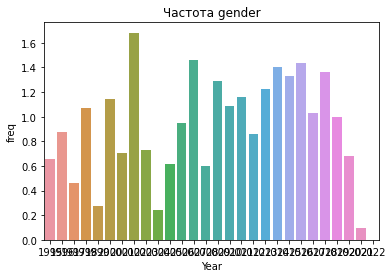

In [51]:
get_token_freq_data('gender', grouped_per_year, year_count)

#Keywords

In [52]:
df.Keywords

1      Feminism,method,objectivity,philosophy of econ...
2      Robinson Crusoe, homo economics,self-sufficien...
3      Peasants,gender,Latin American rural women,con...
4       Caring,labor,family,policy,altruism,reciprocity 
5      Child care,quantitative economics research,job...
                             ...                        
914    Bargaining power,empowerment,entrepreneurship,...
915                                                  NaN
916    Degrowth,care work,commons,decolonial feminism...
917    Self-help group,domestic violence,dowry,India,...
918    Asset,poverty,wealth,Ecuador,feminization of p...
Name: Keywords, Length: 731, dtype: object

In [53]:
df.Keywords.isna().sum()

58

In [64]:
key = df[~df.Keywords.isna()]

In [65]:
key.Keywords=key.Keywords.apply(lambda x:x.lower())

In [56]:
keywords_freq=dict(Counter(key.Keywords.str.split(',').explode().tolist()))

In [57]:
sorted_keys = sorted(keywords_freq.items(), key=lambda x: x[1], reverse=True)

In [58]:
sorted_keys

[('gender', 143),
 ('gender inequality', 30),
 ('women', 27),
 ('employment', 26),
 ('poverty', 24),
 ('china', 23),
 ('time use', 22),
 ('feminist economics', 21),
 ('india', 20),
 ('agency', 18),
 ('feminism', 17),
 ('discrimination', 17),
 ('care', 16),
 ('amartya sen', 16),
 ('childcare', 16),
 ('covid-19', 16),
 ('occupational segregation', 15),
 ('development', 15),
 ('labor force participation', 14),
 ('unpaid work', 14),
 ('education', 14),
 ('globalization', 13),
 ('family', 12),
 ('child care', 12),
 ('gender differences', 12),
 ('social norms', 12),
 ('economic development', 12),
 ("women's labor force participation", 12),
 ('race', 11),
 ('labor supply', 11),
 ('gender equality', 11),
 ('lesbian', 10),
 ('fertility', 10),
 ('welfare reform', 10),
 ('gender wage gap', 10),
 ('empowerment', 10),
 ('gay', 9),
 ('economics', 9),
 ('housework', 9),
 ('well-being', 9),
 ('earnings', 9),
 ('culture', 9),
 ('lone mothers', 9),
 ('methodology', 9),
 ('caregiving', 9),
 ('gender role

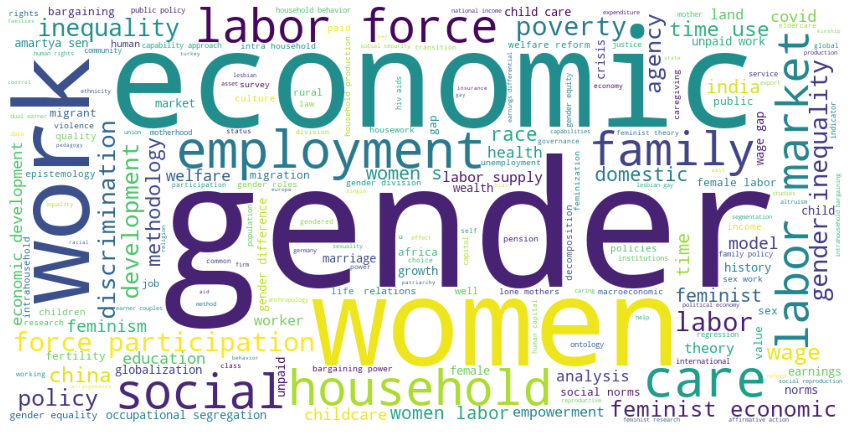

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(key.Keywords.str.split(',').explode().tolist())
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8),facecolor='white')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

#Keywords какие самые популярные?

In [68]:
key.Keywords=key.Keywords.str.split(',')
key=key.explode('Keywords')

/Users/sofiarebrey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
key.groupby('Keywords')['Views'].mean().sort_values(ascending=False)[:50]


Keywords
nonmonetary indicators           31507.500000
history                          21052.333333
social contract                  19756.000000
economic history                 13174.000000
capability approach               9454.500000
trafficking                       9431.500000
export garments                   9103.000000
trust                             8867.000000
reproductive health               8723.000000
job quality                       8723.000000
coronavirus                       8340.000000
democratic governance             8066.000000
pandemic                          7880.000000
gender gap                        7800.000000
sociology                         7439.000000
governance                        7274.000000
evaluation                        7012.000000
public reasoning                  7012.000000
agency                            6608.555556
national leadership               6179.000000
women leaders                     6179.000000
human rights             

In [82]:
groupped_by_keys=key.groupby('Keywords')[['Views','CrossRef','Almetric','WOS','Scopus']].mean().sort_values(by='Views', ascending=False)

In [85]:
groupped_by_keys.sort_values(by='WOS', ascending=False)[:50]

,Views,CrossRef,Almetric,WOS,Scopus
Keywords,,,,,
social contract,19756.000000,980.000000,0.0,899.000000,1146.000000
evaluation,7012.000000,450.000000,0.0,381.000000,463.000000
public reasoning,7012.000000,450.000000,0.0,381.000000,463.000000
capability lists,2933.000000,331.666667,0.0,292.666667,358.333333
martha nussbaum,829.000000,266.000000,0.0,244.000000,299.000000
capabilities,6017.000000,252.000000,0.0,231.200000,294.800000
democracy,2830.666667,176.333333,0.0,215.000000,189.000000
justice,5572.400000,220.000000,0.0,204.400000,255.000000
pierre bourdieu,3923.000000,218.000000,0.0,204.000000,264.000000


In [88]:
df.sort_values(by='CrossRef',ascending=False)[:50]

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access,lemmatized_text,lemmatized_tokens
258,9,2-3,NaN,2003,10090774,CAPABILITIES AS FUNDAMENTAL ENTITLEMENTS: SEN ...,Martha Nussbaum,NaN,rnst Freund Distinguished Service Professor of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-59,20 Jan 2011,https://doi.org/10.1080/1354570022000077926,Amartya Sen has made a major contribution to t...,NaN,"Amartya Sen,Capabilities,Justice,Gender,Human ...",NaN,19756,980,0,NaN,"Tuula Helne, Tuuli Hirvilammi. (2022) Balancin...",899.0,1146.0,1,amartya sen made major contribution theory soc...,"[amartya, sen, made, major, contribution, theo..."
76,3,1,NaN,1997,10090538,'Bargaining'' and Gender Relations: Within and...,Bina Agarwal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-51,20 Jan 2011,https://doi.org/10.1080/135457097338799,Highlighting the problems posed by a ''unitary...,NaN,"Bargaining Models,Bargaining Power,Gender Rela...",NaN,7341,696,0,"Abdullah, Tahrunnessa and Sondra A. Zeidenstei...","Cathy Rozel Farnworth, Preeti Bharati, Vijesh ...",0.0,797.0,1,highlighting problem posed unitary conceptuali...,"[highlighting, problem, posed, unitary, concep..."
259,9,2-3,NaN,2003,10090784,SEN'S CAPABILITY APPROACH AND GENDER INEQUALIT...,Ingrid Robeyns,NaN,"Department of Political Science , University o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-92,20 Jan 2011,https://doi.org/10.1080/1354570022000078024,This paper investigates how Amartya Sen's capa...,NaN,"Amartya Sen,Martha Nussbaum,Capability Approac...",NaN,1134,532,0,NaN,Karen Whalley Hammell. (2022) Securing occupat...,488.0,598.0,1,paper investigates amartya sen capability appr...,"[paper, investigates, amartya, sen, capability..."
291,10,3,NaN,2004,10058384,"Capabilities, Lists, and Public Reason: Contin...",Amartya Sen,"JEL Codes: D63, I3, I31",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77-80,14 Nov 2008,https://doi.org/10.1080/1354570042000315163,Amartya Sen addresses the question why he is d...,NaN,"Capability approach,capability lists,democracy...",NaN,7012,450,0,Dreze JeanSen Amartya1989Hunger and Public Act...,"Megan Devonald, Nicola Jones, Abreham Iyasu Ge...",381.0,463.0,0,amartya sen address question disinclined provi...,"[amartya, sen, address, question, disinclined,..."
274,10,1,NaN,2004,10058407,Comparing Care Regimes in Europe,Francesca Bettio,"JEL Codes: I38, J13, J16",NaN,Janneke Plantenga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85-113,14 Nov 2008,https://doi.org/10.1080/1354570042000198245,"Throughout Europe, the family is still an impo...",NaN,"Families,Europe,social policy,childcare,elderl...",NaN,505,363,0,Abramovici Gérard2002Social Protection: Expend...,"Sabrina Marchetti, Giulia Garofalo Geymonat, A...",357.0,402.0,0,throughout europe family still important provi...,"[throughout, europe, family, still, important,..."
439,15,3,"Inequality, Development, and Growth",2009,389482,The Impact of Gender Inequality in Education a...,Stephan Klasen,NaN,"Department of Economics , University of Göttin...",Francesca Lamanna,NaN,"World Bank Group , 1818H Street, NW, Washingto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [76]:
key

,Volume,Issue,Issue_title,Year,Article_number,Title,Author1,Author1_Info,Author1_Contacts,Author2,Author2_Info,Author2_Contacts,Author3,Author3_Info,Author3_Contacts,Author4,Author4_Info,Author4_Contacts,Author5,Author5_Info,Author5_Contacts,Author6,Author6_Info,Author6_Contacts,Author7,Author7_Info,Author7_Contacts,Author8,Author8_Info,Author8_Contacts,Author9,Author9_Info,Author9_Contacts,Author10,Author10_Info,Author10_Contacts,Pages,Date_published,DOI,Abstract,Highlights,Keywords,JEL codes,Views,CrossRef,Almetric,References,Citations,WOS,Scopus,Open_access,lemmatized_text,lemmatized_tokens
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,feminism,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj..."
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,method,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj..."
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,objectivity,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj..."
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,philosophy of economics,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj..."
1,1,1,NaN,1995,9689204,Can feminist thought make economics more objec...,Sandra Harding,NaN,"Departments of Philosophy, University of Delaw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7-32,18 Jun 2010,https://doi.org/10.1080/714042212,Feminist research is often perceived to be les...,NaN,relativism,NaN,467,47,0,NaN,"Sarah Averi Albala, Frida Kasteng, Arne Hennin...",0.0,87.0,1,feminist research often perceived le objective...,"[feminist, research, often, perceived, le, obj..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,28,1,NaN,2022,1995019,A Gendered Analysis of Individual-Level Asset ...,Boaz Anglade,Boaz Anglade is Postdoctoral Researcher at the...,a University of Florida – Food and Resource Ec...,Pilar Useche,Pilar Useche is Associate Professor of Latin A...,c University of Florida – Center for Latin Ame...,Carmen Diana Deere,Carmen Diana Deere is Distinguished Professor ...,c University of Florida – Center for Latin Ame...,NaN,

Посмотреть изменение тем по годам по ключевым словам

In [ ]:
Ключевые слова / темы и влиятельность статьи (альтметрики)

In [ ]:
Авторы: выделить страну, универ, факультет
Посмотреть как менялись авторы по годам
Популярность и автороство
Какие университеты/страны что изучают 
Какие страны изучают какие страны 
